# Processing and Machine Learning for FEMALES

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-07-31 10:44:17.185159


In [13]:
df = pd.read_csv("Female.csv")

In [14]:
df

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,2,45.000,0,582,1,38,0,319000.0,0.9,140,0,0,244,0
1,6,63.000,1,122,1,60,0,172000.0,1.2,145,0,0,147,0
2,7,70.000,1,171,0,50,1,358000.0,0.9,141,0,0,196,0
3,10,60.667,1,151,1,40,1,257000.0,1.0,136,0,0,172,0
4,11,72.000,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,4995,45.000,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
1768,4996,60.000,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
1769,4997,95.000,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
1770,4998,65.000,1,160,1,20,0,327000.0,2.7,116,0,0,8,1


In [15]:
df = shuffle(df)

## Train - Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[["ejection_fraction","serum_creatinine","serum_sodium","platelets","diabetes","anaemia","creatinine_phosphokinase","smoking","age","high_blood_pressure"]]
y = df[["DEATH_EVENT"]]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 4)


In [19]:
X_train

,ejection_fraction,serum_creatinine,serum_sodium,platelets,diabetes,anaemia,creatinine_phosphokinase,smoking,age,high_blood_pressure
1077,30,1.60,136,297000.0,1,1,128,0,65.0,1
1166,30,0.50,139,404000.0,0,0,2522,0,50.0,1
1182,25,1.00,140,237000.0,0,1,125,0,70.0,1
354,60,0.80,137,319000.0,1,1,200,0,58.0,0
1645,25,1.20,137,318000.0,1,1,156,0,60.0,1
...,...,...,...,...,...,...,...,...,...,...
1569,45,0.90,140,324000.0,0,0,336,0,55.0,1
1358,35,0.90,142,75000.0,1,1,2334,0,50.0,0
1348,38,0.75,140,228000.0,1,0,96,0,60.0,0
625,25,1.30,137,276000.0,0,1,52,0,65.0,1


In [20]:
y_train

,DEATH_EVENT
1077,1
1166,0
1182,1
354,0
1645,0
...,...
1569,0
1358,1
1348,0
625,0


### Sythethic Minority Oversampling Technique (SMOTE)

In [21]:
df["DEATH_EVENT"].value_counts()

,count
DEATH_EVENT,
0,1278
1,494


In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train.values.ravel())
X_train_balanced.shape

(1526, 10)

In [23]:

np.unique(y_train_balanced, return_counts = True)

(array([0, 1]), array([763, 763]))

# Regression

## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train_balanced, y_train_balanced)

LinearRegression()

In [25]:
y_linearRegressionP = linearRegression.predict(X_test)
print(linearRegression.score(X_test,y_test))

0.1546329211334624


In [26]:
mse = mean_squared_error(y_test, y_linearRegressionP)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_linearRegressionP)
print(f"MAE: {mae}")

r2 = r2_score(y_test, y_linearRegressionP)
print(f"R2: {r2}")

MSE: 0.16802032471797376
MAE: 0.3593715263616143
R2: 0.1546329211334624


## Catboost Regressor

    

In [27]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.5 MB/s eta 0:00:00


In [28]:
from catboost import CatBoostRegressor

In [29]:
catmodel = CatBoostRegressor()
catmodel.fit(X_train_balanced, y_train_balanced, verbose = 100)

Learning rate set to 0.04377
0:	learn: 0.4887364	total: 51.8ms	remaining: 51.8s
100:	learn: 0.1496441	total: 320ms	remaining: 2.85s
200:	learn: 0.1047607	total: 605ms	remaining: 2.41s
300:	learn: 0.0825869	total: 1.06s	remaining: 2.46s
400:	learn: 0.0689993	total: 1.45s	remaining: 2.16s
500:	learn: 0.0602397	total: 1.69s	remaining: 1.68s
600:	learn: 0.0528632	total: 1.91s	remaining: 1.26s
700:	learn: 0.0475174	total: 2.1s	remaining: 897ms
800:	learn: 0.0432703	total: 2.32s	remaining: 577ms
900:	learn: 0.0392925	total: 2.45s	remaining: 270ms
999:	learn: 0.0356194	total: 2.62s	remaining: 0us


In [30]:
y_testpredictions = catmodel.predict(X_test)

mse = mean_squared_error(y_test, y_testpredictions)
mae = mean_absolute_error(y_test, y_testpredictions)
r2 = r2_score(y_test, y_testpredictions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"r2: {r2}")



MSE: 0.014120081343692154
MAE: 0.041837682218860646
r2: 0.9289570952864726


## Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

randomForest.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [32]:
y_randomForest = randomForest.predict(X_test)


In [33]:

mse = mean_squared_error(y_test, y_randomForest)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_randomForest)
print(f"MAE: {mae}")

r2 = r2_score(y_test, y_randomForest)
print(f"R2: {r2}")

MSE: 0.015190409026798307
MAE: 0.028067700987306064
R2: 0.923571914723251


# Classification

In [34]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay, classification_report

## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier()

In [36]:
print(RFC.score(X_test, y_test))

0.9830747531734838


In [37]:
YRFC = RFC.predict(X_test)

In [38]:

accuracy = accuracy_score(y_test,YRFC)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, YRFC)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, YRFC)
print(f"Recall Score : {recall}")

confusion_m = confusion_matrix(y_test, YRFC)

roc_auc = roc_auc_score(y_test, YRFC)

print(f"ROC AUC Score : {roc_auc}")

prc = precision_recall_curve(y_test, YRFC)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, YRFC)
auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")




Accuracy : 0.9830747531734838
Precision Score : 0.9642857142857143
Recall Score : 0.9742268041237113
ROC AUC Score : 0.9803172855570014
Precision Recall Curve : (array([0.27362482, 0.96428571, 1.        ]), array([1.       , 0.9742268, 0.       ]), array([0, 1]))
Precision Recall AUC : 0.9727823522935705


In [39]:
print(classification_report(y_test, YRFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       515
           1       0.96      0.97      0.97       194

    accuracy                           0.98       709
   macro avg       0.98      0.98      0.98       709
weighted avg       0.98      0.98      0.98       709



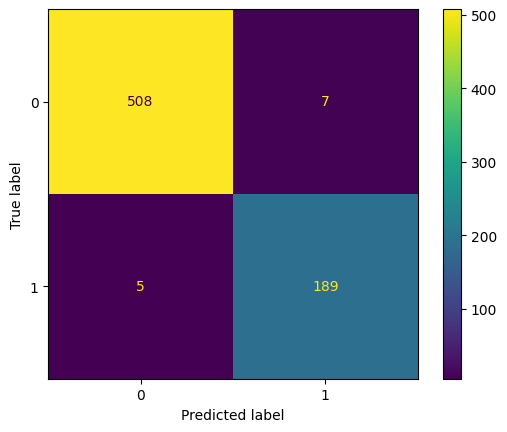

In [40]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

In the Confusion Matrix, the Columns correspond to the predictions made by the ml model, whereas the Rows represent the actual values of the test dataset or known truth.

In our case there are two categories to choose from which is death_event is false or death_event is true.

The top left contains the true negatives, these are patients that have mortality that were correctly predicted by the algorithm.

The true postives are on the bottom right, these are the patients that are survivors that were correctly predicted by the algorithm.

However the bottom left is false negatives, where the patient does have mortality, but the ml predictions state they dont.

The top right is false postives where the patient does not mortality but the ml algorithm states that they have.




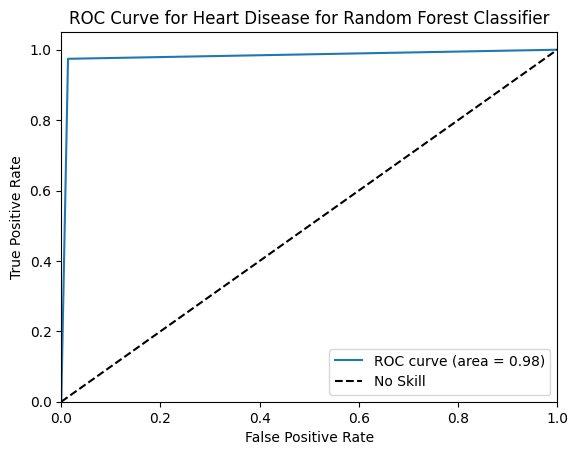

In [41]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, YRFC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Random Forest Classifier')
plt.legend()
plt.show()

Reciever Operator Characteristc ROC graphs provides a way to summurize all the information.

Y axis shows the true postive rate, which is the same as sensitvity. The X axis shows the false positive rate same thing as specitivity.

The true postive rate tells you the proportion of the true samples were correctly classified, i.e the proportion of mortality patients that were correctly classified.

The false postive rate tells you the proportion of the false samples were incorrectly classified, for instance the proportion of survivors that were incorrectly classified as mortality.

The no skill line shows where the True postive rate = False postive rate. Therefore it means that at any point on this line means that the proportion of correctly identified postives is the same as the proportion of the incorrectly classifed postives.

ROC Graph summarizes all of the confusion matrices that each classification threshold produced. From the ROC graph we can determine what threshold or cut off value is the best for each ml model for making a decision.

Area Under the Curve or AUC makes it easier to compare one ROC curve to another. If the AUC for model A is greater then the AUC for model B, we can state that model A is better then model B.

ROC curves make it easy to determine the best threshold for making a decision. Classifiers that give curves closer to the top-left corner indicate a better performance as they are better able to have a greater proportion of true postives compared to false postives. i.e if there is a point of (x = 10,y =100) we can infer that for 10 false postives the model will have 100 true postives, i.e 10:100.






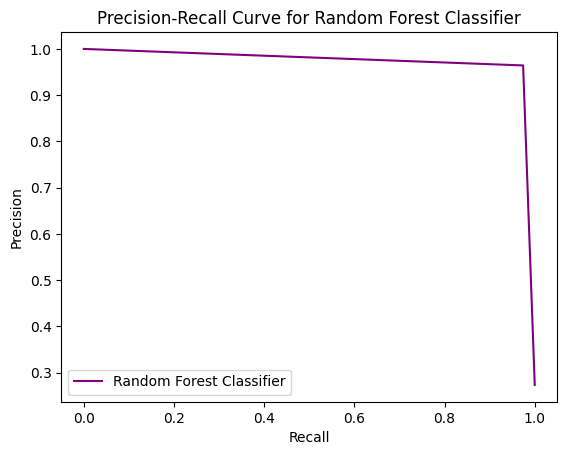

In [42]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, YRFC)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "Random Forest Classifier")



#add axis labels to plot
ax.set_title('Precision-Recall Curve for Random Forest Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

ROC and AUC has its limitations when we deal with inbalanced datasets, where the balance between postives and negatives are not 50:50.

Precision is how many instances of the predicted postive datapoints are actually positve. The Precision is not influcened by the number of negative datapoints, therefore its preferred with inbalanced datasets. Each point in the precsion graph is a threshold in which the precision and recall is calculated.

Recall is in the x axis in the precision recall graph.

Precision measures the percentage of correct predictions, while recall measures the percentage of relevant data points that were correctly identified.

Precision
The number of true positives divided by the number of true positives plus the number of false positives

Recall
The number of true positives divided by the number of true positives plus the number of false negatives



## Support Vector Machine (SVM)

In [43]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [44]:
svm = SVC(kernel = "rbf", gamma = 0.5, C=1.0)
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.5)

In [45]:
y_svm = svm.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test,y_svm)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, y_svm)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, y_svm)
print(f"Recall Score : {recall}")

confusion_m = confusion_matrix(y_test, y_svm)

roc_auc = roc_auc_score(y_test, y_svm)
print(f"ROC AUC Score : {roc_auc}")

prc = precision_recall_curve(y_test, y_svm)
print(f"Precision Recall Curve : {prc}")

Accuracy : 0.9576868829337094
Precision Score : 1.0
Recall Score : 0.845360824742268
ROC AUC Score : 0.9226804123711341
Precision Recall Curve : (array([0.27362482, 1.        , 1.        ]), array([1.        , 0.84536082, 0.        ]), array([0, 1]))


In [47]:
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       515
           1       1.00      0.85      0.92       194

    accuracy                           0.96       709
   macro avg       0.97      0.92      0.94       709
weighted avg       0.96      0.96      0.96       709



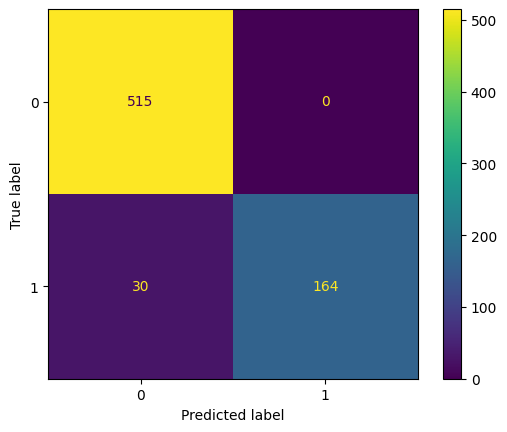

In [48]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

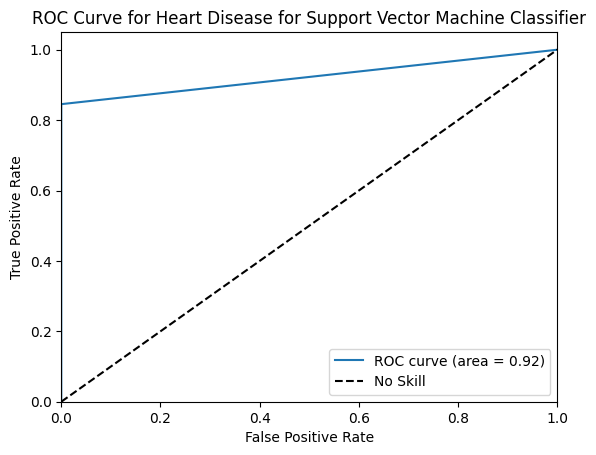

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_svm)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Support Vector Machine Classifier')
plt.legend()
plt.show()

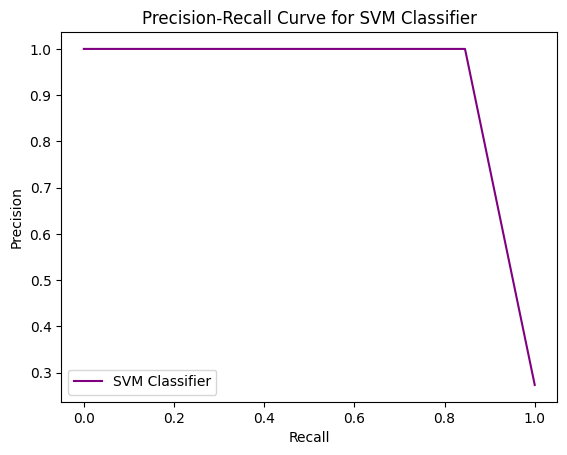

In [50]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_svm)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "SVM Classifier")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for SVM Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

##  KNN Classifier




In [51]:
from sklearn.neighbors import KNeighborsClassifier


In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [61]:
yknn = knn.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test,yknn)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, yknn)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, yknn)
print(f"Recall Score : {recall}")

confusion_m = confusion_matrix(y_test, yknn)

roc_auc = roc_auc_score(y_test, yknn)
print(f"ROC AUC Score: {roc_auc}")

Accuracy : 0.9464033850493653
Precision Score : 0.9148936170212766
Recall Score : 0.8865979381443299
ROC AUC Score: 0.9277649884896407


In [64]:
print(classification_report(y_test,yknn))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       515
           1       0.91      0.89      0.90       194

    accuracy                           0.95       709
   macro avg       0.94      0.93      0.93       709
weighted avg       0.95      0.95      0.95       709



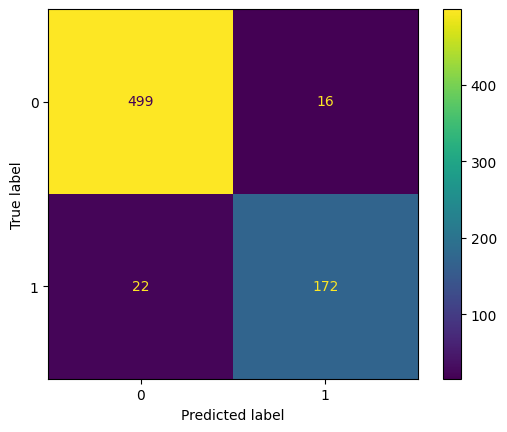

In [67]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

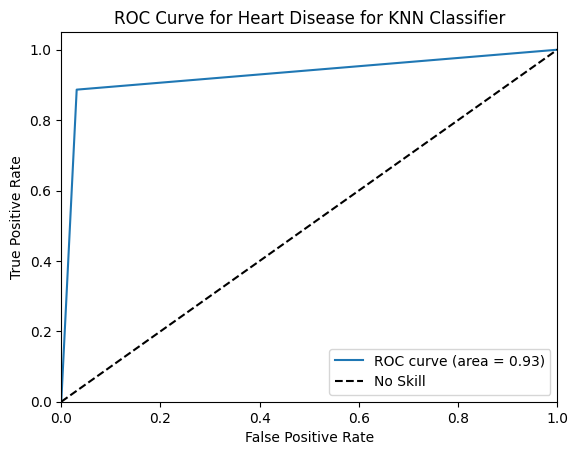

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, yknn)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for KNN Classifier')
plt.legend()
plt.show()

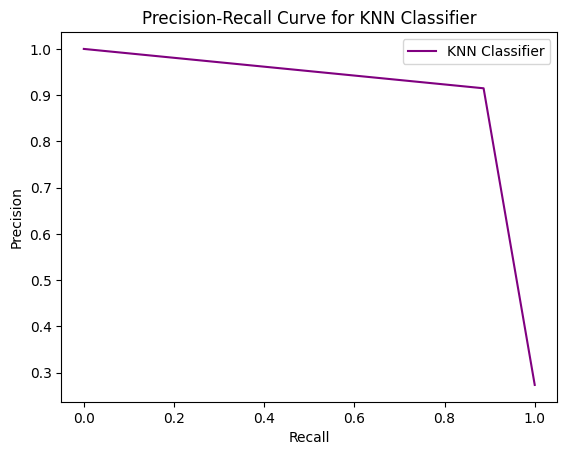

In [69]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, yknn)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "KNN Classifier")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for KNN Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

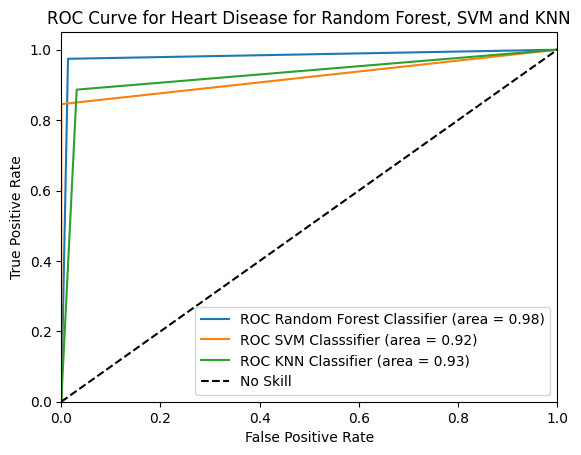

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, YRFC)
fpr2, tpr2, thresholds = roc_curve(y_test, y_svm)
fpr3, tpr3, thresholds = roc_curve(y_test, yknn)
roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Random Forest Classifier (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='ROC SVM Classsifier (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='ROC KNN Classifier (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Random Forest, SVM and KNN')
plt.legend()
plt.show()

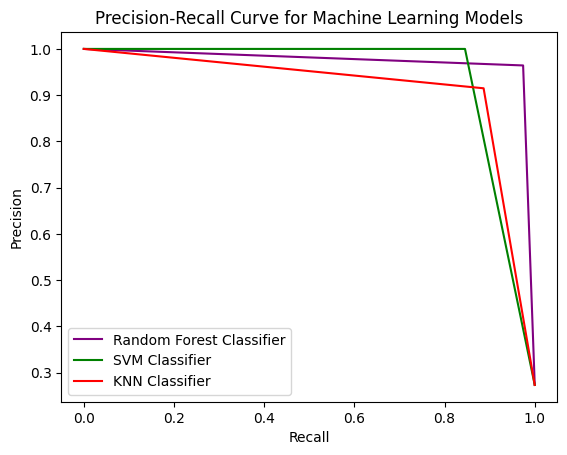

In [71]:
#calculate precision and recall
precision1, recall1, thresholds1 = precision_recall_curve(y_test, YRFC)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_svm)
precision3, recall3,thresholds3 = precision_recall_curve(y_test, yknn)


#create precision recall curve
fig, ax = plt.subplots()
plt.plot(recall1, precision1, color='purple', label = "Random Forest Classifier")
plt.plot(recall2, precision2, color='green', label = "SVM Classifier")
plt.plot(recall3, precision3, color='red', label = "KNN Classifier")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Machine Learning Models')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

# Artifical Neural Networks

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.optimizers import SGD

## Single Layer Perceptron

In [73]:
singleLModel = Sequential([
Dense(10, activation='sigmoid')
])

In [74]:
singleLModel.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mse"])

In [75]:
singleLModel.fit(X_train_balanced, y_train_balanced, validation_data = (X_test, y_test), epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
31/31 [==============================] - 1s 9ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5453 - val_mse: 0.5453
Epoch 2/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5453 - val_mse: 0.5453
Epoch 3/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5453 - val_mse: 0.5453
Epoch 4/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5453 - val_mse: 0.5453
Epoch 5/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5453 - val_mse: 0.5453
Epoch 6/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5453 - val_mse: 0.5453
Epoch 7/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5453 - val_mse: 0.5453
Epoch 8/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5000 - m

In [81]:
ySingleLModel = singleLModel.predict(X_test)

23/23 [==============================] - 0s 2ms/step


In [82]:
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError
#from tensorflow.keras.metrics import R2Score
mean_squared_error = MeanSquaredError()
mean_absolute_error = MeanAbsoluteError()


mse = mean_squared_error(y_test, ySingleLModel)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, ySingleLModel)
print(f"MAE: {mae}")

MSE: 0.545275092124939
MAE: 0.545275092124939


## Multilayer Perceptron

In [76]:
mlpModel = Sequential([
    Dense(300, activation = "sigmoid"),
    Dense(30, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(500, activation = "sigmoid")
])

In [77]:
opt = SGD(learning_rate = 0.05, momentum=0.99)
mlpModel.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mse"])

In [78]:
mlpModel.fit(X_train_balanced, y_train_balanced, validation_data = (X_test, y_test), epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
31/31 [==============================] - 3s 19ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2503 - val_mse: 0.2503
Epoch 2/500
31/31 [==============================] - 0s 10ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2503 - val_mse: 0.2503
Epoch 3/500
31/31 [==============================] - 0s 8ms/step - loss: 0.2501 - mse: 0.2501 - val_loss: 0.2498 - val_mse: 0.2498
Epoch 4/500
31/31 [==============================] - 0s 6ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2501 - val_mse: 0.2501
Epoch 5/500
31/31 [==============================] - 0s 6ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2503 - val_mse: 0.2503
Epoch 6/500
31/31 [==============================] - 0s 5ms/step - loss: 0.2501 - mse: 0.2501 - val_loss: 0.2502 - val_mse: 0.2502
Epoch 7/500
31/31 [==============================] - 0s 5ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2501 - val_mse: 0.2501
Epoch 8/500
31/31 [==============================] - 0s 6ms/step - loss: 0.2500 -

In [79]:
yMLP = mlpModel.predict(X_test)

23/23 [==============================] - 0s 2ms/step


In [80]:
mlpModel.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 0.2502 - mse: 0.2502


[0.25022196769714355, 0.25022196769714355]

In [83]:
mean_squared_error = MeanSquaredError()
mean_absolute_error = MeanAbsoluteError()

mse = mean_squared_error(y_test, yMLP)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, yMLP)
print(f"MAE: {mae}")

MSE: 0.25022196769714355
MAE: 0.5002217292785645
